<a href="https://colab.research.google.com/github/wouroud/cassandra-loader/blob/master/Womxn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt

from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold,train_test_split
from lightgbm import LGBMRegressor
import lightgbm

from sklearn.metrics import mean_squared_error

import random
seed = 10 
random.seed(seed)
np.random.seed(seed)

In [80]:
train = pd.read_csv('/content/drive/My Drive/Womxn zindi/Train.csv')
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [89]:
dwelling_types = ['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 
                        'dw_11', 'dw_12', 'dw_13', 'target']
train[dwelling_types].head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,target
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,16.773757
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,21.496661
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,10.931425
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,23.119257
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,13.652252


In [90]:
train[dwelling_types].corr()[['target']]

,target
dw_00,0.018461
dw_01,0.458206
dw_02,-0.232727
dw_03,-0.338137
dw_04,-0.385533
dw_05,-0.146357
dw_06,-0.248573
dw_07,-0.177763
dw_08,-0.186627
dw_09,-0.235331


In [91]:
school_attendance = ['psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'target']
train[school_attendance].head()

,psa_00,psa_01,psa_02,psa_03,psa_04,target
0,0.260191,0.607898,0.000188,0.010018,0.121705,16.773757
1,0.290228,0.549788,0.000000,0.021336,0.138647,21.496661
2,0.186435,0.677005,0.000489,0.021315,0.114757,10.931425
3,0.281229,0.593281,0.000579,0.007249,0.117663,23.119257
4,0.196687,0.517578,0.000989,0.005148,0.279598,13.652252


In [92]:

train[school_attendance].corr()[['target']]

,target
psa_00,0.782472
psa_01,-0.707506
psa_02,-0.097613
psa_03,-0.301572
psa_04,0.203999
target,1.000000


In [0]:
train['household_size'] = train['total_individuals'] / train['total_households']

In [94]:
train[['household_size', 'target']].corr()[['target']]

,target
household_size,-0.039266
target,1.000000


In [0]:
final_fields = ['dw_01','psa_00',  'stv_01', 'car_01', 'lln_01', 'lan_05', 'pg_00', 'pw_06', 'lon']

In [0]:

X = train[final_fields]
y = train[['target']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [109]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [110]:
y_pred = rfr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.947973596597996

In [0]:
test = pd.read_csv('/content/drive/My Drive/Womxn zindi/Test.csv')


In [0]:
test['household_size'] = test['total_individuals'] / test['total_households']

Preparing the datasets...
Starting LightGBM. Train shape: (2822, 9), test shape: (1013, 9)
Starting the model...
Training for fold number  1/5 :
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[46]	training's rmse: 2.49905	training's l2: 6.24526	valid_1's rmse: 3.73919	valid_1's l2: 13.9816
The rmse model's prediction is: 3.7391929034316185
Training for fold number  2/5 :
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 1.90804	training's l2: 3.64062	valid_1's rmse: 3.48171	valid_1's l2: 12.1223
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 1.90804	training's l2: 3.64062	valid_1's rmse: 3.48171	valid_1's l2: 12.1223
The rmse model's prediction is: 3.4817127012983837
Training for fold number  3/5 :
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 1.88535	training's l2: 3.55455	valid_1's rmse: 3.80855	valid_1's l2: 14.5051
Did not meet early st

(3.6655127861065124, 0.11134757657561017)

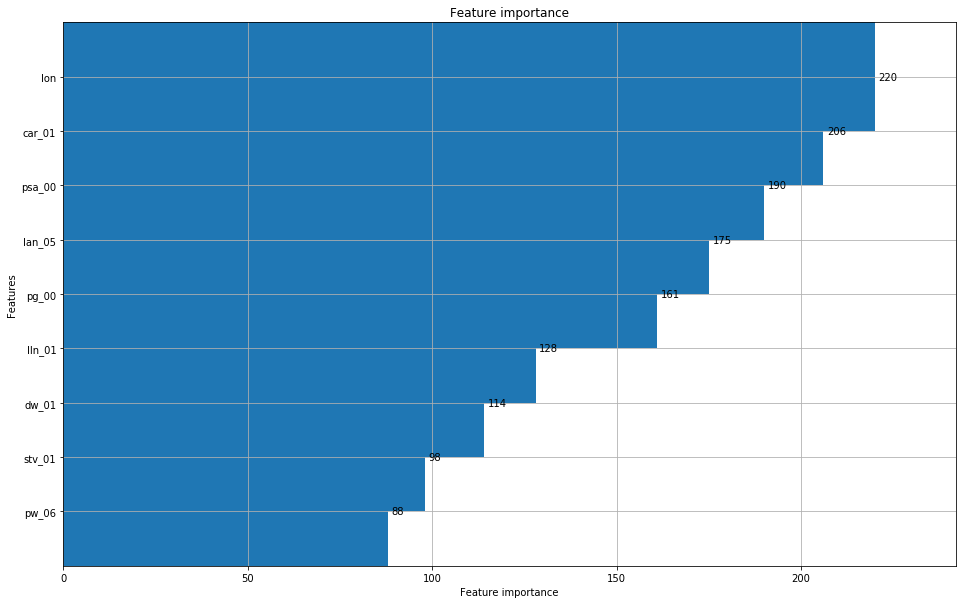

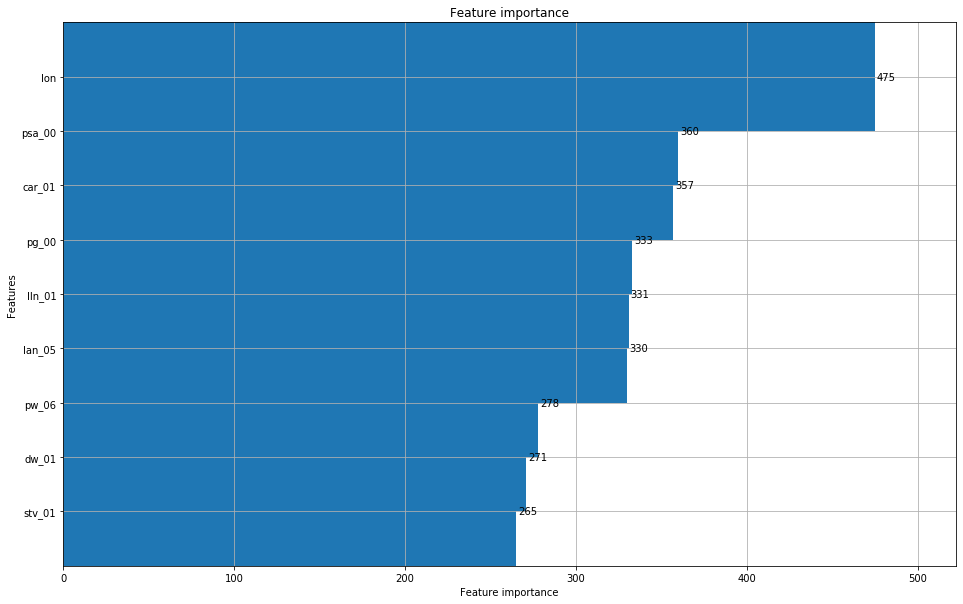

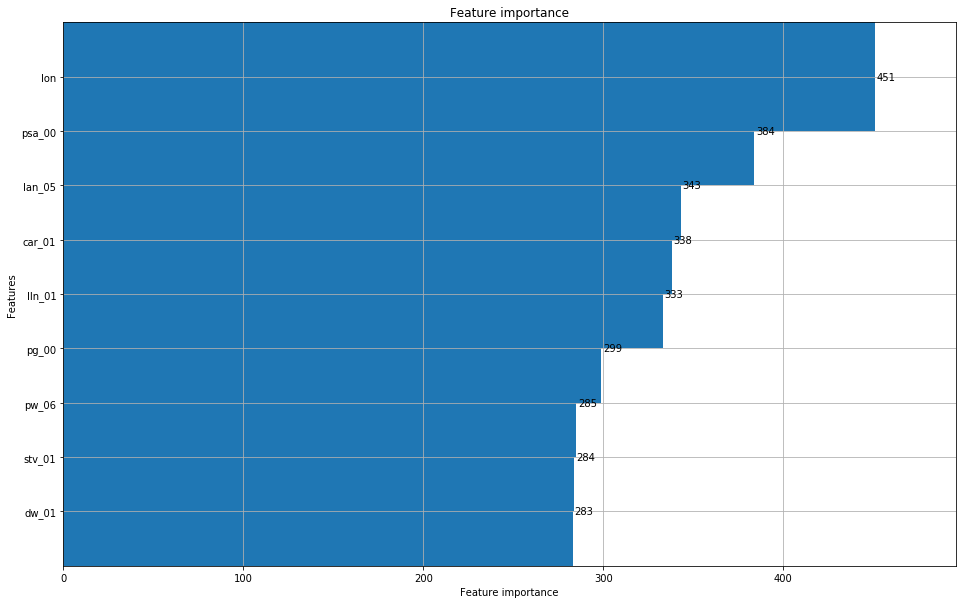

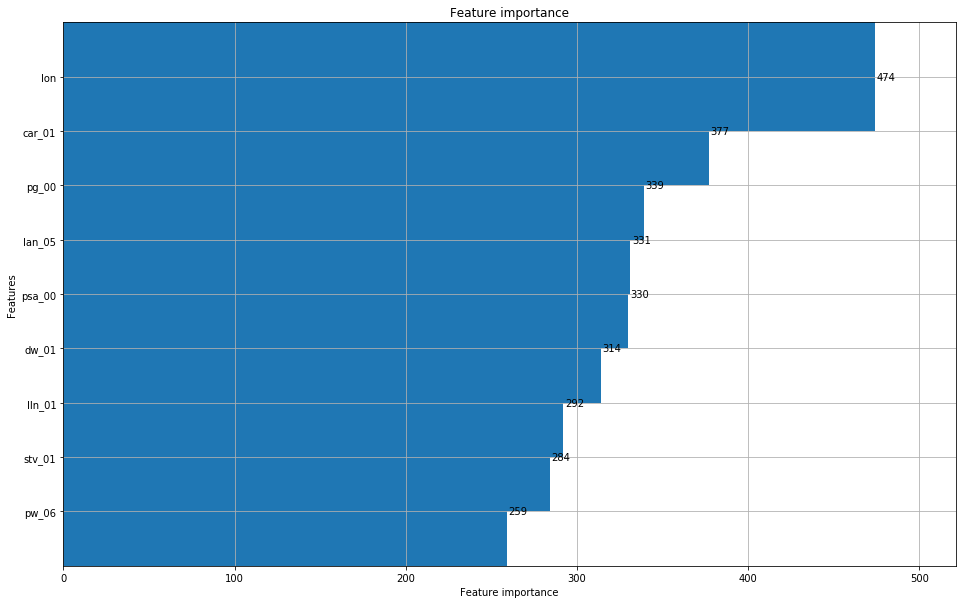

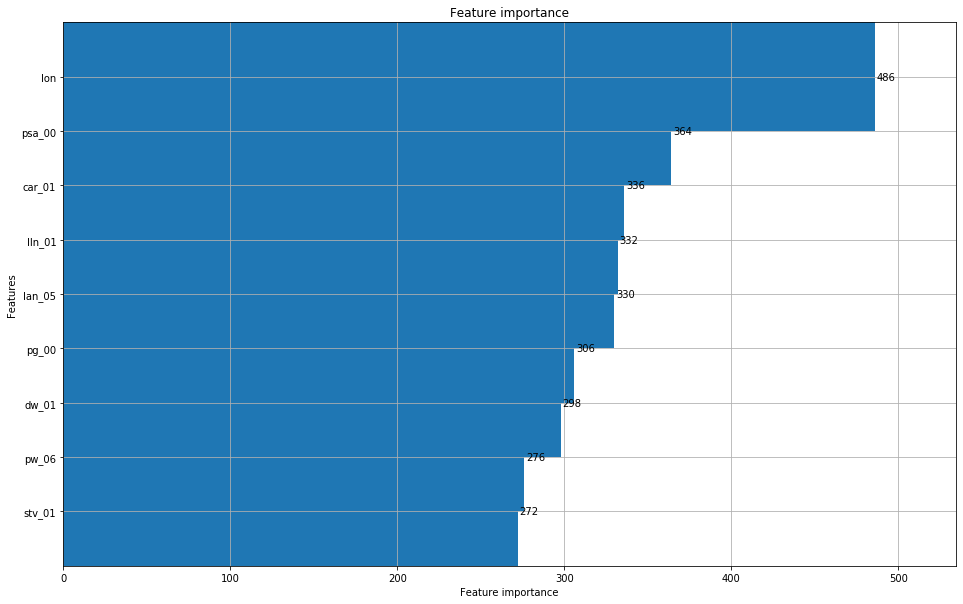

In [113]:
def kfold_lightgbm(X,y, debug= False):
    print("Preparing the datasets...")

    final_test = test[final_fields]
    test['target'] = 0.

   
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(X.shape, final_test.shape))
    
    score=[]
    
    print("Starting the model...") 
    folds = KFold(n_splits=5, shuffle=True, random_state=1)
    for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X)):
        print("Training for fold number  %d/5 :" %(n_fold+1))
        trn_x, trn_y = X.iloc[trn_idx], y.iloc[trn_idx]
        val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
        

        lgbr = LGBMRegressor(
            # n_estimators=100000,
            # learning_rate=0.001,
            # num_leaves=22,
            # # colsample_bytree=.8,
            # # subsample=.7,
            # max_depth=5,
            # reg_lambda=10,
            # seed=42
        )

        lgbr.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='rmse', verbose=100, early_stopping_rounds=50,
               )
        score.append(lgbr.best_score_['valid_1']['rmse'])
        val_pred=lgbr.predict(val_x,num_iteration=lgbr.best_iteration_)

        print("The rmse model's prediction is:", mean_squared_error(val_y, val_pred) ** 0.5)

        test['target'] += lgbr.predict(final_test,num_iteration=lgbr.best_iteration_)
        
 
        lightgbm.plot_importance(lgbr, height=2.0, max_num_features=25)    

        del lgbr, trn_x, trn_y, val_x, val_y
        

    print("Creating submission CSV File...")
    # Write submission file and plot feature importance
    if not debug:
        test_submission = "test_submission.csv"
        test['target'] = test['target'] / 5
        test[['ward', 'target']].to_csv(test_submission, index= False)
        
    print("CSV Created: Done")    
    


    return score

score = kfold_lightgbm(X,y)
np.mean(score), np.std(score) 

In [0]:
final_test = test[final_fields]

In [0]:
y_pred_rfr = rfr.predict(final_test)

In [0]:
submission_rfr = pd.DataFrame(columns=['ward', 'target'])

In [77]:

submission_rfr['ward'] = test['ward']
submission_rfr['target'] = y_pred_rfr
submission_rfr.head()

,ward,target
0,21001001: Ward 1,21.262042
1,21001002: Ward 2,12.022272
2,21001003: Ward 3,19.399543
3,21001004: Ward 4,16.819031
4,21001005: Ward 5,23.266105


In [0]:
submission_rfr.to_csv('submission_rfr.csv', index=False)